In [ ]:
!pip install kaggle

In [ ]:
#path for configuring kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Cifar-10 DS api
!kaggle competitions download -c cifar-10

100% 715M/715M [00:32<00:00, 24.3MB/s]
100% 715M/715M [00:32<00:00, 23.2MB/s]


In [ ]:
#exteacting the compressed DS
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


You can not extract .7z file , format with zipfile lib so instead zip we use **py7zr**

In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 34.2 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z' , mode='r')
archive.extractall()  #archive.extractall(path = '/content/traning data')
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


First we build a basic NN later we input pretrained model RESNET50 and train this model on this Cifar10 dataSet to detect object

In [ ]:
#libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['6204.png', '48090.png', '23455.png', '35947.png', '28750.png']
['41542.png', '4437.png', '31294.png', '45890.png', '28422.png']


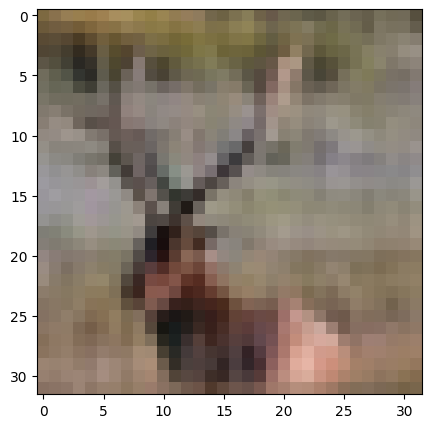

In [ ]:
plt.figure(figsize=(5,5))
# Read the image using mpimg.imread
img = mpimg.imread(os.path.join('/content/train', filenames[0]))
plt.imshow(img) # Display the image data
plt.show()

**trainLabels**.csv Processing

In [ ]:
Labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
Labels_df.shape #total images , 2 columns(id and label)

(50000, 2)

In [ ]:
Labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
Labels_df[Labels_df['id']==1]

,id,label
0,1,frog


In [ ]:
Labels_df[Labels_df['id']==2]

,id,label
1,2,truck


In [ ]:
Labels_df[Labels_df['id']==16785]

,id,label
16784,16785,frog


To check ids are in order or not

In [ ]:
Labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
Labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


Reading imgs in order from id 0-50000..or numerical encoder(one hot encoding)

no of labeld=10

In [ ]:
Labels_df['label'].value_counts() #evenly distributed (if not even model donot predict well)

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


Now do one hot encoding manually


frog --> 0

truck--> 1 .......

In [ ]:
Labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [ ]:
labels_dist= { 'airplane':0 , 'automobile':1 , 'bird':2 , 'cat':3 , 'deer':4 , 'dog':5 , 'frog':6 , 'horse':7 , 'ship':8 ,'truck':9 }

labels=[labels_dist[i] for i in Labels_df['label']]  #when for loop runs
#first time i==0 ('frog') . this  will check the label in labels_dist where frog ==6


In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


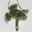

In [ ]:
#display sample images in train folder
import cv2
from google.colab.patches import cv2_imshow

img= cv2.imread('/content/train/16785.png') #imread convert img to numpy array
cv2_imshow(img) #convert numpy array to a image and display in image form

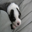

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img= cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
Labels_df[Labels_df['id']==45888]

,id,label
45887,45888,dog


To read imgs in order in train folder

In [ ]:
Labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list= list(Labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# **Image** **processing**

In [ ]:
#convrt img to numpy images

train_data_fldr = '/content/train/' #/ for all images

data = []

for id in id_list:
  image = Image.open(train_data_fldr + str(id) +'.png') #if we want image ti resized then di it before converting to numpy array
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape #32*32 and 3= RGB

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
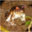

In [ ]:
data[0]

In [ ]:
#convert images list  and labels list to numpy array
X  = np.array(data)
Y = np.array(labels)


In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape) #lABELS

(50000, 32, 32, 3)
(50000,)


## **Train** **Test** **split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.2 , random_state=2)

In [ ]:
print("total images:\n", X.shape)
print("X_train:\n", X_train.shape)
print("X_test:\n", X_test.shape)
print("Y_train:\n", Y_train.shape)
print("Y_test:\n", Y_test.shape)

total images:
 (50000, 32, 32, 3)
X_train:
 (40000, 32, 32, 3)
X_test:
 (10000, 32, 32, 3)
Y_train:
 (40000,)
Y_test:
 (10000,)


In [ ]:
#Scale down or normalization 0==0 , 255==1
X_train_Scaled = X_train/255
X_test_Scaled = X_test/255

In [ ]:
print(X_test_Scaled[0])

[[[0.99215686 0.87843137 0.71764706]
  [0.99215686 0.88235294 0.7254902 ]
  [0.99607843 0.89411765 0.73333333]
  ...
  [1.         0.88627451 0.72941176]
  [0.99607843 0.88235294 0.7254902 ]
  [0.99215686 0.87843137 0.72156863]]

 [[0.97647059 0.8745098  0.71764706]
  [0.98039216 0.87843137 0.7254902 ]
  [0.98431373 0.89019608 0.74117647]
  ...
  [0.98823529 0.8745098  0.71764706]
  [0.98431373 0.87058824 0.71372549]
  [0.98039216 0.86666667 0.71372549]]

 [[0.98039216 0.88235294 0.72941176]
  [0.98823529 0.89411765 0.74509804]
  [0.99607843 0.90588235 0.76078431]
  ...
  [0.99215686 0.8745098  0.71372549]
  [0.98823529 0.8745098  0.71764706]
  [0.98431373 0.87058824 0.71372549]]

 ...

 [[0.98431373 0.87058824 0.71372549]
  [0.98823529 0.8745098  0.71764706]
  [0.98823529 0.8745098  0.71764706]
  ...
  [0.98823529 0.8745098  0.71372549]
  [0.98823529 0.8745098  0.71764706]
  [0.98431373 0.87058824 0.71372549]]

 [[0.98431373 0.87058824 0.71372549]
  [0.98823529 0.8745098  0.71764706]


Object Detection using CNN

In [ ]:
# Step 6: Build a CNN from Scratch
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the CNN model
cnn_model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the feature maps
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Summary of the model
cnn_model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,818 (655.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 7: Train the Model
cnn_history = cnn_model.fit(X_train_Scaled, Y_train,
                             validation_split=0.1,
                             epochs=15,
                             batch_size=64)



Epoch 1/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.1875 - loss: 2.0988 - val_accuracy: 0.4248 - val_loss: 1.5624
Epoch 2/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3801 - loss: 1.6539 - val_accuracy: 0.4577 - val_loss: 1.5074
Epoch 3/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4684 - loss: 1.4701 - val_accuracy: 0.5688 - val_loss: 1.2011
Epoch 4/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5289 - loss: 1.3273 - val_accuracy: 0.5980 - val_loss: 1.1330
Epoch 5/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5664 - loss: 1.2312 - val_accuracy: 0.6158 - val_loss: 1.0787
Epoch 6/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5961 - loss: 1.1596 - val_accuracy: 0.6115 - val_loss: 1.0652
Epoch 7/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6275 - loss: 1.0869 - val_accuracy: 0.6442 - val_loss: 0.9884
Epoch 8/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6446 - loss: 1.0187 - val_accuracy:

In [ ]:
# Step 8: Evaluate the Model
test_loss, test_accuracy = cnn_model.evaluate(X_test_Scaled, Y_test)
print(f"CNN Model Test Accuracy: {test_accuracy:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6799 - loss: 1.0034
CNN Model Test Accuracy: 0.6832


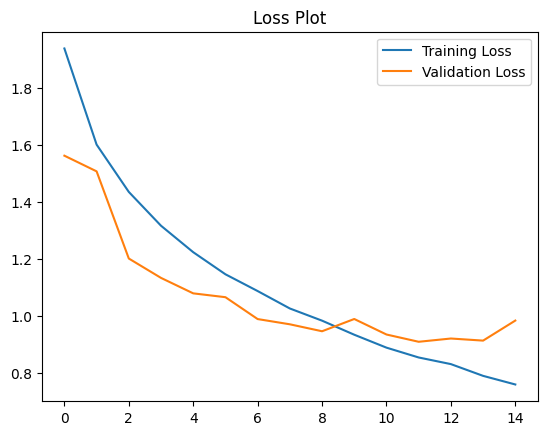

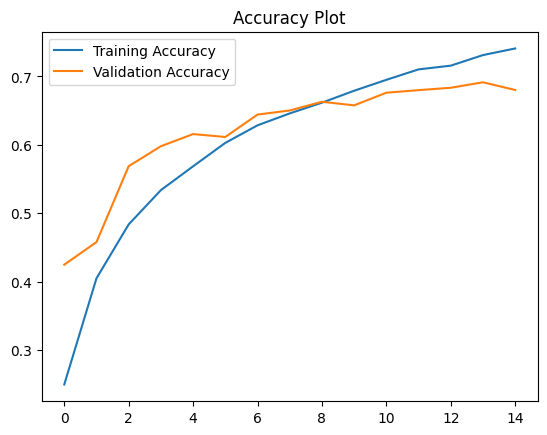

In [ ]:
# Step 9: Visualize Training History
# Loss Plot
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Plot")
plt.show()

# Accuracy Plot
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Plot")
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


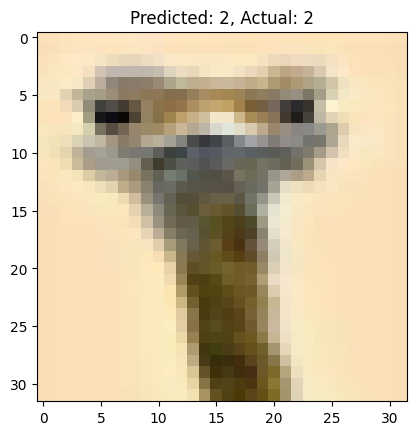

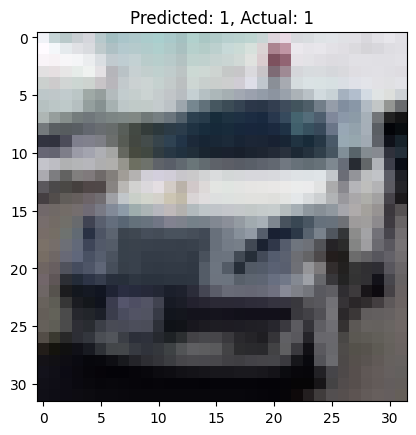

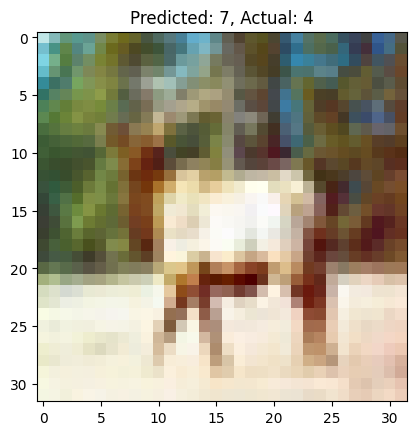

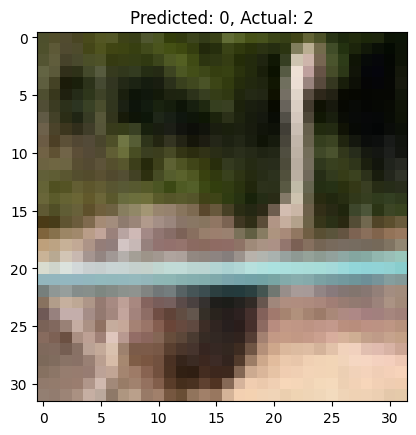

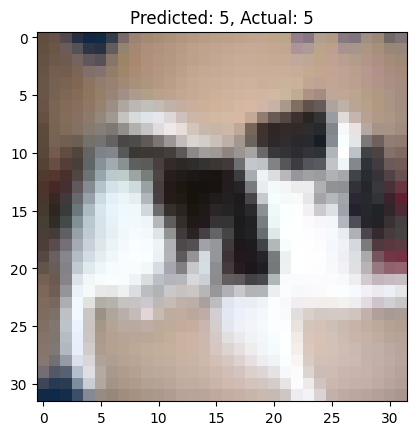

In [ ]:
# Step 10: Predictions
predictions = cnn_model.predict(X_test_Scaled)
predicted_classes = np.argmax(predictions, axis=1)

# Display predictions for some test images
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {Y_test[i]}")
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


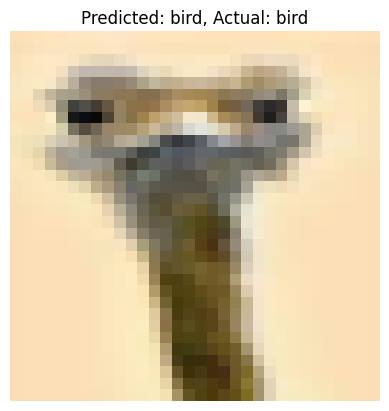

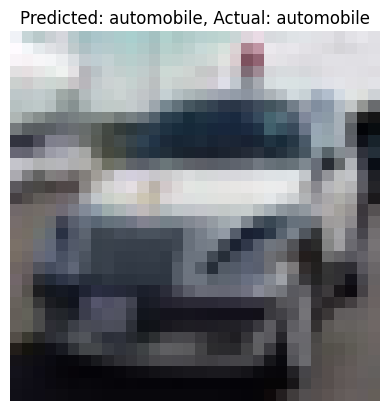

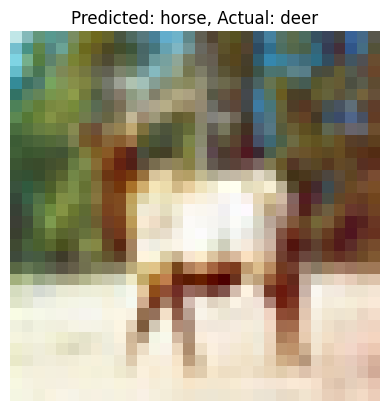

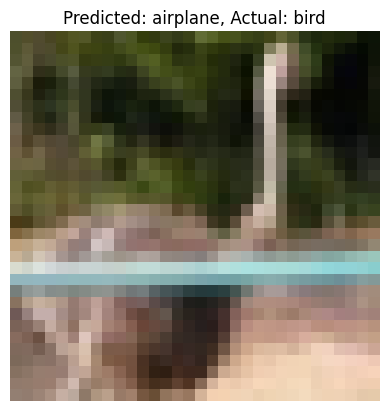

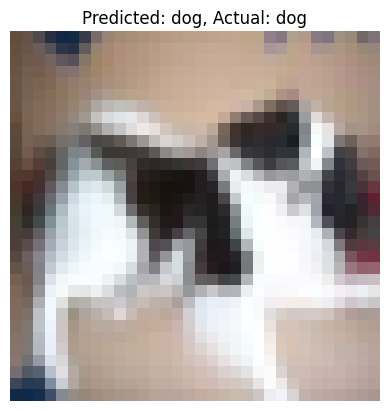

In [ ]:
# Step 10: Predictions
predictions = cnn_model.predict(X_test_Scaled)
predicted_classes = np.argmax(predictions, axis=1)

# Reverse mapping for label indices to class names
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Display predictions for some test images
for i in range(5):  # Display 5 test images
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {reverse_label_mapping[predicted_classes[i]]}, Actual: {reverse_label_mapping[Y_test[i]]}")
    plt.axis('off')  # Turn off axis for a clean display
    plt.show()


**Building** **the** **NN**

and

**USING** **RESNET50** **model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models,optimizers

In [ ]:
num_of_classes = 10

#set up a basic NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128,activation ='relu'),
    keras.layers.Dense(64,activation ='relu'),
    keras.layers.Dense(32,activation ='relu'),
    keras.layers.Dense(num_of_classes,activation ='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam' ,
              loss = 'sparse_categorical_crossentropy',
              metrics= ['Acc'])

In [ ]:
model.fit(X_train_Scaled,Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - Acc: 0.2449 - loss: 2.0437 - val_Acc: 0.3500 - val_loss: 1.8004
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Acc: 0.3521 - loss: 1.7901 - val_Acc: 0.3823 - val_loss: 1.6856
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Acc: 0.3809 - loss: 1.7080 - val_Acc: 0.3950 - val_loss: 1.6889
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Acc: 0.4085 - loss: 1.6485 - val_Acc: 0.4227 - val_loss: 1.6107
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Acc: 0.4319 - loss: 1.5878 - val_Acc: 0.4272 - val_loss: 1.5642
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Acc: 0.4429 - loss: 1.5477 - val_Acc: 0.4505 - val_loss: 1.5239
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Acc: 0.4496 - loss: 1.5318 - val_Acc: 0.4487 - val_loss: 1.5226
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Acc: 0.4619 - loss: 1.4993 - val_Acc: 0.4308 - val_loss: 1.5835
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

Goal is to minimize the loss function and accuracy max

# USING A PRETRAINED MODEL **ResNet50** AND TRANING IT OUR OWN CUSTOM DATASET

In [ ]:
from tensorflow.keras import Sequential, models,layers,optimizers
from tensorflow.keras.layers import Dense , Dropout , Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
conv_base=ResNet50(weights='imagenet' , include_top=False , input_shape=(256,256,3))
#imagenet -> like image database it contain around 40 millions images
#include_top -> import resnet50 model but drop the final (output)layer(distinguish in labels).we add our own output layer
#input_shape=(256,256,3) -> this is the shape in which resnet50 take images
conv_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

Add our own layer to this conv_base

In [ ]:
model =models.Sequential()
model.add(layers.UpSampling2D((2,2))) #32 *2=64
model.add(layers.UpSampling2D((2,2))) #64*2=128
model.add(layers.UpSampling2D((2,2))) #128*2=256 --> 256=256 RESNET50 MODEL INPUTSHAPE FORMAT 256*256
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dropout(0.5))#to reduce over-fitting
model.add(layers.BatchNormalization())

model.add(layers.Dense(num_of_classes, activation = 'softmax'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5) ,
             loss = 'sparse_categorical_crossentropy',
              metrics= ['Acc'] )

In [ ]:
history = model.fit(X_train_Scaled , Y_train , validation_split=0.1 , epochs=10 )


Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 484s 368ms/step - Acc: 0.1042 - loss: 11.8995 - val_Acc: 0.1552 - val_loss: 9.6361
Epoch 2/10
 593/1125 ━━━━━━━━━━━━━━━━━━━━ 3:02 343ms/step - Acc: 0.1158 - loss: 11.5489

In [ ]:
loss , accuracy = model.evaluate(X_test_Scaled , Y_test )
print(" TEST  ACCuracy = " , accuracy)

In [ ]:
#plotting for loss
plt.plot(history.history['loss'], label='Traning_Loss ')
plt.plot(history.history['val_loss'], label='validation_Loss ')
plt.legend()
plt.show()

In [ ]:
#plotting for Accuracy
plt.plot(history.history['Accuracyy'], label='Traning_Accuracy ')
plt.plot(history.history['val_Acc'], label='validation_Acc ')
plt.legend()
plt.show()

In [ ]:
# Step 12: Predictions
predictions = resnet_model.predict(X_test_resized)
predicted_classes = np.argmax(predictions, axis=1)

# Display predictions for some test images
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {Y_test[i]}")
    plt.show()